chebyshev.ipynb was getting too big, so we're starting a new one

In [1]:
from sympy import init_session
init_session()
from mpmath import mpf
%matplotlib inline

IPython console for SymPy 1.0.1.dev (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev



Now we try to mechanise the CRAM process

In [2]:
def bisect_roots(expr, bounds, eps=1e-7, division_cutoff=30, solver='bisect', **kwargs):
    """
    Numerically find all the roots of expr in bounds via bisection
    
    division_cutoff is the fraction of bounds to check for roots. 
    One should expect the roots to be no more than |bounds|/division_cutoff apart.
    """
    roots = []
    intervals = [bounds]
    var = expr.free_symbols.pop()
    N = 0
    while intervals:
        N += 1
        #print(intervals)
        b = intervals.pop()
        try:
            root = nsolve(expr, b, solver=solver, **kwargs)
        except ValueError:
            # No root found
            if (b[1] - b[0]) > (bounds[1] - bounds[0])/division_cutoff and sign(expr.evalf(subs={var: b[0]})) == sign(expr.evalf(subs={var: b[1]})):
                # The bisect method will only work if the interval has alternate signs.
                # If not, it will miss 2 roots, so try again with split intervals.
                intervals.append([b[0], (b[0] + b[1])/2])
                intervals.append([(b[0] + b[1])/2, b[1]])
                continue
        else:
            if root not in roots:
                roots.append(root)
                intervals.append([b[0], root - eps])
                intervals.append([root + eps, b[1]])
    
    print(N)
    return sorted(roots)

bisect_roots(sin(x), [-10, 13])

115


[mpf('-9.4247779607693797'),
 mpf('-6.2831853071795865'),
 mpf('-3.1415926535897932'),
 mpf('0.0'),
 mpf('3.1415926535897932'),
 mpf('6.2831853071795865'),
 mpf('9.4247779607693797'),
 mpf('12.566370614359173')]

In [25]:
def nsolve_intervals(expr, bounds, division=30, **kwargs):
    """
    Divide bounds into division intervals and nsolve in each one
    """
    roots = []
    L = bounds[1] - bounds[0]
    for i in range(division):
        interval = [bounds[0] + i*L/division, bounds[0] + (i + 1)*L/division]
        try:
            root = nsolve(expr, interval, solver='bisect', **kwargs)
        except ValueError:
            continue
        else:
            roots.append(root)
            
    return roots
        
#nsolve_intervals(D, [-1, 0.99])

Iteration 0


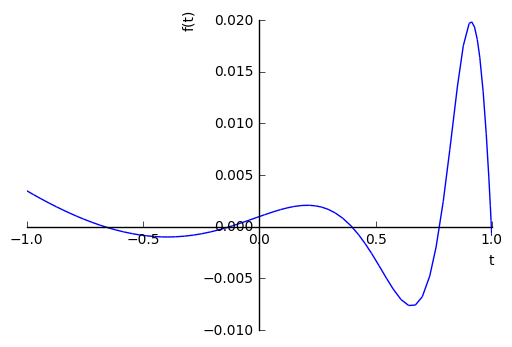

[-1, mpf('-0.39565791460279479499284076200145651802194653114540703774480227487610120954351626085982451403500283398874705992525356469566365206128'), mpf('0.20603211542927461384052611378834875581138146418501405286803189300278497192699398042477521899218756204766151167176792091242420544972'), mpf('0.65524004465746337679757203042853328237991430154169277378086856067753659029747234581245049385511998865450055850746324094212235309453'), mpf('0.91102615427504502530061390488727282384081613622125907182823434023386272326868471474132913927962127252132686925394919327525002971058'), 1]
[0.0034725654836155765706029957710571135345190105522356050146955756770519875857720077933651076377234730715114008956984065593960488874, -0.00099840506780781844495938247077075857301870555892277634655500587359799650440311887174145124785946139073944134915185699972230692368, 0.0020706431242257288610734017936251244214002283299112170167483421281239549632532226066026447124394750281886876882664694158029197320, -0.007685320714697

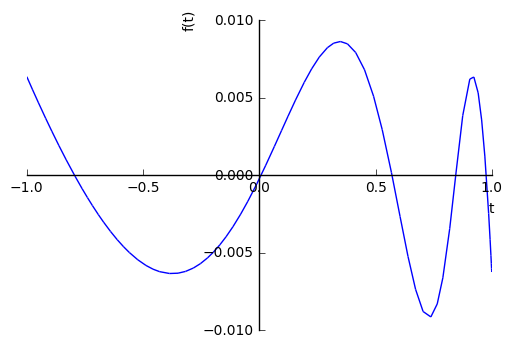

[-1, mpf('-0.37423221537544858082744714811135917322883174714129783071210912917161560403884512744654777079904082826170420206617441837103412380144'), mpf('0.34755816563385690270918232917242926456286291845369515870715385111098746260110109441576856179315933776617087028991643156620455717185'), mpf('0.72985719589158027042275080797112563123701832370797370767093864240645979679469958728646314195887544086902915813407205693711646156691'), mpf('0.91644293046356388221653284616036024533085011649280272873804661746359764092397463301193004195545987965737363998151630418346525465481'), 1]
[0.0063413534395056994910747986294461853803302485417225425183903400710961900759781787282096832728273907628702486289995280016474222306, -0.0063607828845915630414660192038194231175676556105789803075823355492375714435307803085343277029510304361983917570480211704194127804, 0.0086127117172990223944079569070426626373160128805155627099620031066070386438070557053838166322155837412901141750477724768317250663, -0.0091988950628605

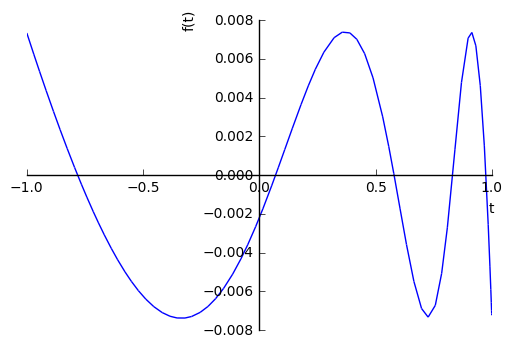

[-1, mpf('-0.33577798449465076813747047857437798377435395527010674573925812645241308416213523176508145722319727917249453403553342505461459888729'), mpf('0.36929050004917631937391799160567065420266813196463084097711888104239021531813529706639965842005806686725333026796994307854240888098'), mpf('0.72626140591530339593017876300629321657514208782677137921087975485524935141978298262328589860349424849379993252993939698438269571648'), mpf('0.9116446633514414210114099699628220298778868968797061185891204858840091400360674686563880202470233316314122551636028338776242926663'), 1]
[0.0073280067281830298680289158351830307206101228881300762579219628806392871727689011682565614803947030080571709575710020685374216870, -0.0073934379352574897991263173216547558644570508855769641463720315304056792838986216833859886575872776493421444278683071791252656315, 0.0073947611012631632050741213200558164166896647780408554504474337185263444355971630231909759618262118458647975719558030032705175838, -0.00733583611681205

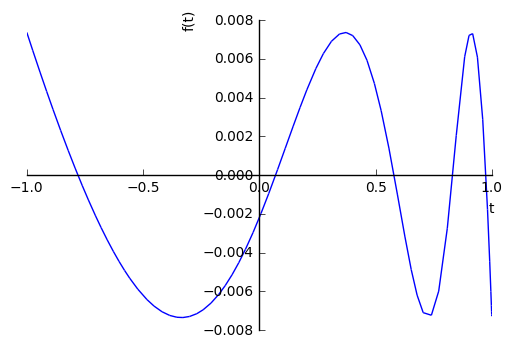

[-1, mpf('-0.33530372125158645395617467525471689373318664355395527368322869843221911680149196186289359001333986092878207317271792205825854765331'), mpf('0.36899339571899591349334950841482142339194385541603747817332856684136205829694434739834164263038379102898525216793495088876738779688'), mpf('0.72614008232185634992573665318989507346683683291747014099895939611821327542046285537678589341575118955341420016507114134592629555043'), mpf('0.91161791846422027213180924552813883952338930330453930888637398493164141974211230003280160899563998771581357049028260707198801699689'), 1]
[0.0073586647169183371323151569808031922805765483793416736951750955670577822615027331205667864951066147098838106230455669906227014342, -0.0073586747701168932579857745328300712213538019862979234291341951189352379688162415599950328190302505168474796111268250548059091676, 0.0073586775671246494411879074351666441554201676566245966635371237600183640581466010766750197438089469813205831812784125430011457199, -0.0073586735380620

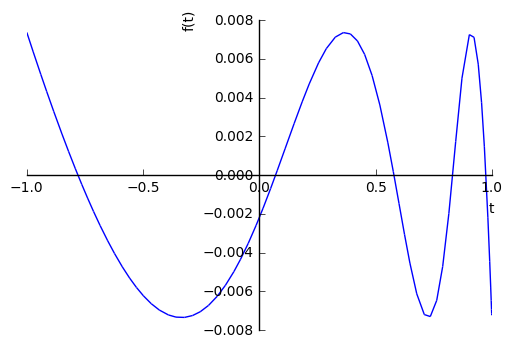

[-1, mpf('-0.33530359100799056276224468682573879307987875512629287555468736337786705116776851258452088947394095017917431192791239128863775429865'), mpf('0.3689933964030978345625740964673264907425877051567831181760303994653784564786659300261089009820398316423752606422245525435211401987'), mpf('0.72614004598521864518672641826607923519284875204950226629149725872234458362518524132992595304947898602987328343850334347251066222826'), mpf('0.9116179009303497031114468892918456299770205970795775940791889884964953852833757249784244446845974905515781392662910417236951392984'), 1]
[0.0073586701695801133889583131110906068041199845887589502293950145785775482607889882302093853489257276545344327359737224014381921885, -0.0073586701695808765271572237236620513661815480817607463520343299811098563974552295418219567325674044935411113475899148372088788876, 0.0073586701695801321824875277196446569587895469153238561446830794895750937535795711761783882577936876241246465218633287609172957588, -0.007358670169580809

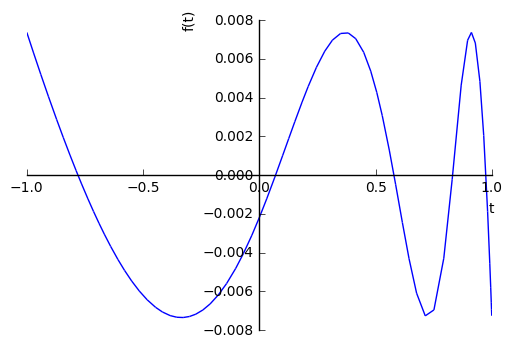

[-1, mpf('-0.33530359100798980524749678809334020787688184855406316128079079359465851797899030662714731832610960868155435409844294738849734474485'), mpf('0.3689933964030977305823867969232095230905488475298960440296340969339772001106105467133396023825106520596864041877398517830484213766'), mpf('0.72614004598521957393085270687063216583299278865938319629289542995874994316466249838884449922229888908593517126171138821077494158155'), mpf('0.91161790093034867802940877953652506131669416024519513017040610863228289213872953267454361881195187486397781979431898923038132273172'), 1]
[0.0073586701695804955713909885597251540212160797660122172060482127633180200310633941837926800633336626154349676612971775593725674790, -0.0073586701695805135895336855511084845374273060700803430890580864054640613496424992125265598097973477312364653099654736197833860133, 0.0073586701695804708936039975756263066026920041905387505163480288928296475339289417483999532609022640980216789225544701572628920796, -0.00735867016958050

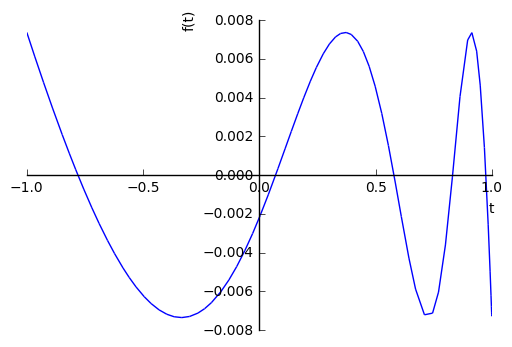

[-1, mpf('-0.3353035910079879995133129854291969430100643227220354326848514472722562831610415963248010049570551550801365382601533519490199188635'), mpf('0.36899339640309884150235327695837651130933673019763107840309015943985518757264737177387827456129669534917795657483517386060252444711'), mpf('0.72614004598521973001876368405379286294594233842227120380399427783043691843627216944511462229351132116123519291654531758027885384624'), mpf('0.91161790093034868333086834935644135064274771202378843267894947622523235729397157229804900676860466201470029215171395383789161831755'), 1]
[0.0073586701695805564969119929673629631220817446842605647992511715006948809927813740266910847392720538250370270443646073669767687639, -0.0073586701695805796530052325591774614380736002524196852846827602606687423795129567758915884037894410213797210224850440292500567833, 0.0073586701695805138907739202960585722236734163262034063122344687465367701091122175099545674965397740143185697884296994816950160611, -0.00735867016958047

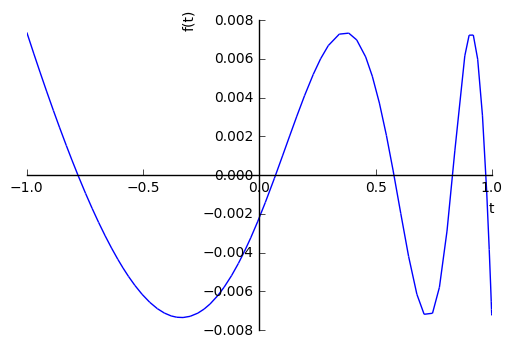

[-1, mpf('-0.33530359100798974676359052803134299602659399447969066940461315501664474686354028189698058169316126724691636895959811793563734432006'), mpf('0.36899339640309750612917093424139252268272413084238102329879779386611184971725228531423484160424211402909120202332847787351345730245'), mpf('0.72614004598521964901044379736137805303409566166118309012797489011739494765080017084056780014886239966550384177787886417499879258309'), mpf('0.91161790093034894189652532111054986592144309495583064794882313697034317831709731959314573570270308027517441359620971054855901943673'), 1]
[0.0073586701695805097130923316554941446002014520796496803054698397511407793442261464080553737257781311734961406529139197138475922200, -0.0073586701695805358545776399978333485000626022827892822998087354147729128415807510373687480607973575175230680813719179655139658790, 0.0073586701695804560174104711856324067328634775098073521450273724115580228904865378268710950242706665347181234241012975032265599024, -0.0073586701695806

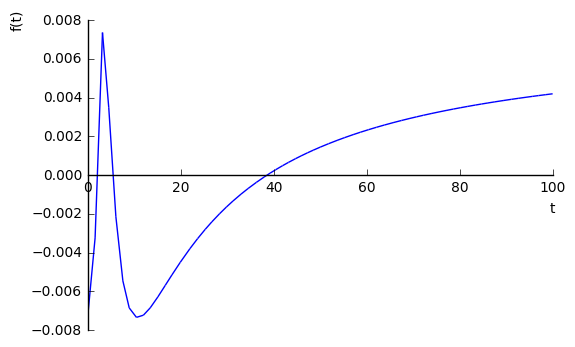

In [166]:
from sympy.utilities.decorator import conserve_mpmath_dps

@conserve_mpmath_dps
def CRAM_exp2(loops=2):
    import mpmath
    prec = 128
    mpmath.mp.dps = prec

    epsilon = symbols("epsilon")
    p0, p1, p2, q1, q2 = symbols("p0, p1, p2, q1, q2")
    i = symbols("i")
    
    r = (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)
    E = exp(-(-t - 1)/(2*t - 2)) - r
    expr = E + (-1)**i*epsilon
    expr = expr*(1 + q1*t + q2*t**2)
    expr = simplify(expr)

    points = [chebyshevt_root(7, 6 - j) for j in range(1, 7)]
    for iteration in range(loops):
        print("Iteration", iteration)
        system = Tuple(*[expr.subs({i: j, t: points[j]}) for j in range(5)])
        system = system + Tuple(expr.replace(exp, lambda i: 0).subs({i: 5, t: 1}))
        #print(system)
        sol = dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))
        D = diff(E.subs(sol), t)
        plot(E.subs(sol), (t, -1, 1))
        # More 9's here means more accuracy, but we can't use 1 because of the singularity
        points = [-1, *nsolve_intervals(D, [-1, 0.99], maxsteps=300), 1]# mpf('0.9999999999999999999999999999999999999999999999999999999999999999999999999999')]
        print(points)
        Evals = [E.evalf(prec, subs={**sol, t: point}) for point in points[:-1]] + [-r.evalf(prec, subs={**sol, t: 1})]
        print(Evals)
        print('max - min', max(Evals) - min(Evals))
        print('epsilon', sol[epsilon])
        assert len(points) == 6
    
    print(sol)
    sol = {i: Rational(str(sol[i])) for i in sol}
    print(sol)
    n, d = together(r.subs(sol).subs(t, (2*t - 1)/(2*t + 1))).as_numer_denom() # simplify/cancel here will add degree to the numerator and denominator
    rat_func = (Poly(n)/Poly(d).TC())/(Poly(d)/Poly(d).TC())
    return rat_func.evalf(prec)

#D = CRAM_exp2()

rat_func = CRAM_exp2(8)
print(rat_func)
plot(rat_func - exp(-t), (t, 0, 100))

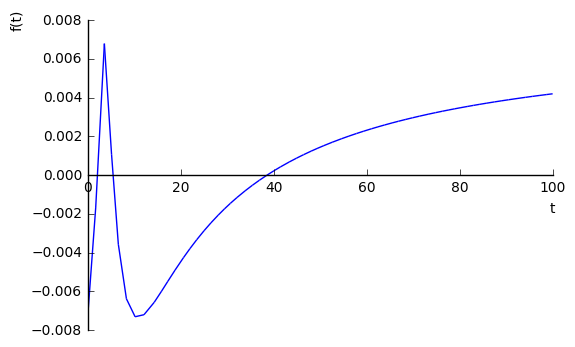

In [85]:
#correct_rat_func2 = (9.92641e-1 + -1.88332e-1*t + 4.21096e-3*t**2)/(1 + 6.69295e-1*t + 5.72258e-1*t**2)
#plot(correct_rat_func2 - exp(-t), (t, 0, 100))

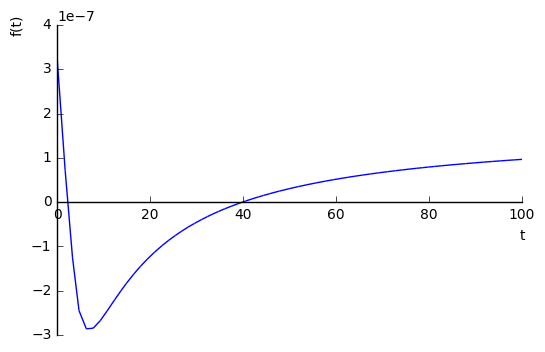

In [86]:
#plot(rat_func - correct_rat_func2, (t, 0, 100))

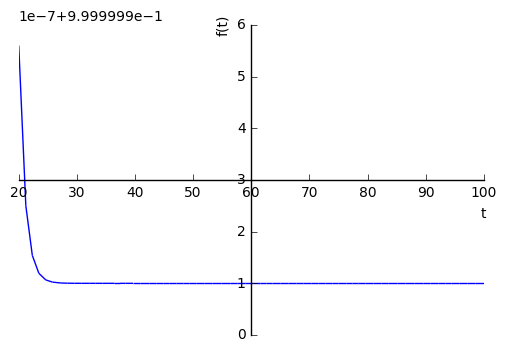

In [41]:
plot((correct_rat_func2 - exp(-t))/correct_rat_func2, (t, 20, 100))

In [5]:
nsolve(D, (-1, -0.39506511254484362 - 1e-20), solver='bisect', tol=1e-20)

mpf('-0.39506511254488194')

In [6]:
#import mpmath
#mpmath.findroot?

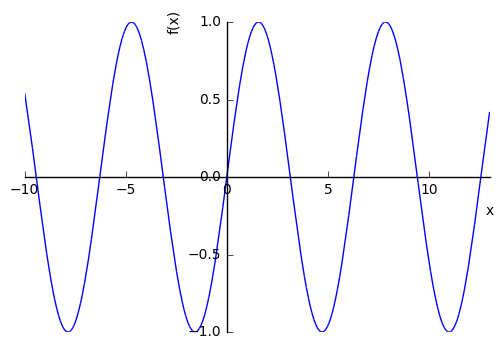

In [7]:
plot(sin(x), (x, -10, 13))

In [8]:
nsolve(sin(x), [-10, -0.1], solver='bisect')

mpf('-3.1415926535897932')

In [9]:
bisect_roots(D, [-1, 0.9], solver='bisect')

109


[mpf('-0.39506511254488194'),
 mpf('0.20691058995492143'),
 mpf('0.65489012733236148'),
 mpf('0.89772666518036129'),
 mpf('0.89772676518036132'),
 mpf('0.89772676518036132'),
 mpf('0.89772686518036127'),
 mpf('0.89772686518036127'),
 mpf('0.89772696518036121'),
 mpf('0.89772696518036121'),
 mpf('0.89772706518036116'),
 mpf('0.89772706518036116')]

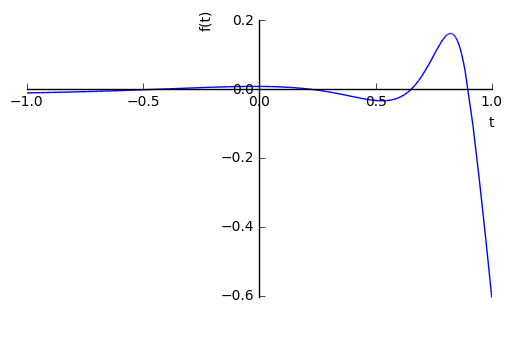

In [10]:
plot(D, (t, -1, 1))

In [11]:
nsolve(D, [mpf('0.2069106899549174') + 1e-4, 0.999], solver='ridder')

ValueError: Could not find root within given tolerance. (1.065e-06 > 2.1684e-19)
Try another starting point or tweak arguments.

In [ ]:
intervals = [[i/30, (i+1)/30] for i in range(-30, 29)]

In [ ]:
def catch_ValueError(f):
    try:
        return f()
    except ValueError:
        pass

In [ ]:
[catch_ValueError(lambda: nsolve(D, b, solver='bisect')) for b in intervals]

In [ ]:
sin(x).evalf(subs={x: mpf('9.9999999999999995e-8')})

In [12]:
nsolve(D, (-1, 0), solver='bisect')

mpf('-0.39506511254488194')

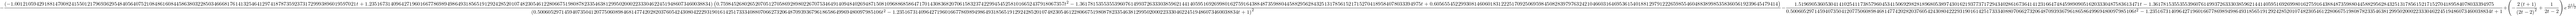

In [13]:
D

In [34]:
import mpmath
try:
    mpmath.mp.dps = 128
    print(nsolve(D, (-1, 0), solver='bisect', maxsteps=300))
finally:
    mpmath.mp.dps = 15

ValueError: Could not find root within given tolerance. (1.38725 > 1.40884e-132)
Try another starting point or tweak arguments.

In [30]:
chebyshevt(2, x)

In [91]:
0.9999999999999999

In [92]:
0.99999999999999999

In [106]:
exp(-(-t - 1)/(2*t - 2))

In [107]:
solve((0.57224957904836676579778131095824616229041363386436155632065723326613208320645433529158968043480368460271370103317310738469165646*t**2 + 0.66930154271086975944415360267931286108869186534800442869820775970713699218292282609079303557228276229468949430966691265928683428*t + 1.0))

In [111]:
[1, 2, 3][:-1]

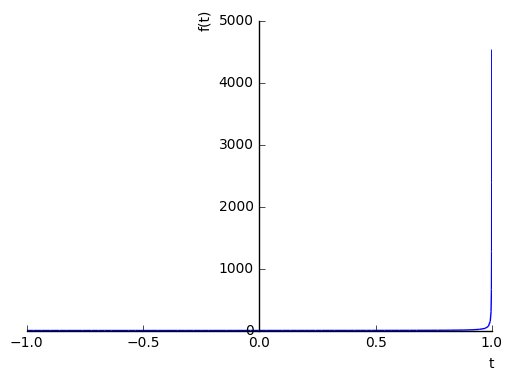

In [116]:
plot((t + 1)/(t - 1)*(-1/2), (t, -1, 1))

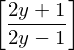

In [120]:
solve(y - -(-t - 1)/(2*t - 2), t)

In [124]:
exp(-(-t - 1)/(2*t - 2)).evalf(subs={t: 0})

In [128]:
len('42109959068982')

In [130]:
@conserve_mpmath_dps
def test_increased_dps():
    # Issue 8564
    import mpmath
    mpmath.mp.dps = 128
    x = Symbol('x')
    e1 = x**2 - pi
    q = nsolve(e1, x, 3.0)

    assert abs(sqrt(pi).evalf(128) - q) < 1e-128

test_increased_dps()

In [137]:
@conserve_mpmath_dps
def test_mpf_subs():
    import mpmath
    mpmath.mp.dps = 128
    a = mpf('1') + mpf('1e-100')
    print(a)
    print(x.subs(x, a))
    print(Float(a))

test_mpf_subs()

1.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000
1.00000000000000


In [144]:
@conserve_mpmath_dps
def test_increased_dps2():
    # Issue 8564
    import mpmath
    mpmath.mp.dps = 128
    x = Symbol('x')
    e1 = x**2 - pi
    q = nsolve(e1, x, 3.0)
    print((x**2).subs(x, q))
    print(pi.evalf(128))

test_increased_dps2()

3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446


In [159]:
p0, p1, p2, q1, q2, epsilon = symbols("p0, p1, p2, q1, q2, epsilon")
r = (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)
mpf = lambda i: Float(i, 128)
sol = {q1: mpf('-1.1598158896958144389688907541448290768017556418690225475316113676987123000368036156835800708110657203943382445749046292411027838124'), epsilon: mpf('-0.0073586701695804955713909885597251540212160797660122172060482127633180200310633941837926800633336626154349676612971775593725674790502'), p1: mpf('-1.3420582608178928401767377898250826050312440510776128093723998679786607122879166676244905769597498693757444204486264349423147412592'), q2: mpf('0.54706937851182403348832181267224373295821044378627516587652817178767445252898045643900602804552389487580236216086250141313671452195'), p2: mpf('0.73617861351264467252445532341623038921509966014009367227031009417645097851179620934054146565716699654528814524660644163951335402577'), p0: mpf('0.6087293180014645115203537929174427433501475052521283394857491045045741371996335477254671722188240766010031663167379415577767292914')}
other_rat_func ="(0.0042109959068981902319228224147959051043334784348885130731594832554304543920692286150512328715813585751529478908147308247510818304*t**2 - 0.1883335019892743246297189560004799477752569428797900790843481507588522143198473107264222704579544281038255097909548061885535647*t + 0.99264132983041950442860901144027484597878392023398778279395178723668197996893660581620731993666633738456503233870282244062743252)/(0.57224957904836377040707255710162720198078512465710225748045909842276672878045476079146532782980255617241659394936652703249328588*t**2 + 0.66930154271087159949217750010925437712785181665997133501826390508750116474339450131113420220623360917322211168993495402213680723*t + 1.0)"

n, d = together(r.subs(sol).subs(t, (2*t - 1)/(2*t + 1))).as_numer_denom() # simplify/cancel here will add degree to the numerator and denominator
rat_func = (Poly(n)/Poly(d).TC())/(Poly(d)/Poly(d).TC())
print(rat_func)
print(other_rat_func)
del mpf

(0.0042109959068981903672474918875361551007743401128474766461802591015712655915560212085757577812298111403461332420727108940545962494*t**2 - 0.18833350198927433660307962375773654674462542624169163004230191709861650774462882479765838272526363158731185437928170659058040915*t + 0.9926413298304194180068495413519683855439395137082812516374575465853211659111912419679717799455724616744715155164834640408451293)/(0.57224957904836372570736532872030629677308743654023638843264990775530979197679586149353512762232398453528690780049165209508067807*t**2 + 0.66930154271087160162786406975682578159531634634707357772167429073040499365644728839234121616979336460323388632486469784004599072*t + 1.0)
(0.0042109959068981902319228224147959051043334784348885130731594832554304543920692286150512328715813585751529478908147308247510818304*t**2 - 0.1883335019892743246297189560004799477752569428797900790843481507588522143198473107264222704579544281038255097909548061885535647*t + 0.9926413298304195044286090114402748459